In [3]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ddlin\Desktop\ImageClassification\virtualenvironment\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.1.21
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.16.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.8.0
idna                         3.4
importlib-metadata           6.0.0
ipykernel                    6.21.1
ipython                      8.9.0
jedi 

You should consider upgrading via the 'C:\Users\ddlin\Desktop\ImageClassification\virtualenvironment\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow as tf
import os

In [7]:
import cv2
import imghdr

In [8]:
directory = 'data'

In [9]:
extensions = ['jpg', 'jpeg', 'png', 'bmp']

In [10]:
for img_class in os.listdir(directory): 
    for image in os.listdir(os.path.join(directory, img_class)):
        img_path = os.path.join(directory, img_class, image)
        try: 
            img = cv2.imread(img_path)
            ext = imghdr.what(img_path)
            if ext not in extensions: 
                print('Image not in extension list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e: 
            print('Problem with image {}'.format(img_path))

In [11]:
dataset = tf.keras.utils.image_dataset_from_directory('data')

Found 274 files belonging to 2 classes.


In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
iterator = dataset.as_numpy_iterator()

In [14]:
batch = iterator.next()

In [15]:
len(batch)

2

In [16]:
batch[0]

array([[[[243.6289    , 248.6289    , 254.6289    ],
         [233.77734   , 238.77734   , 244.77734   ],
         [232.18555   , 237.18555   , 243.18555   ],
         ...,
         [ 75.30859   ,  79.49414   ,  77.9375    ],
         [ 69.        ,  74.77734   ,  74.666016  ],
         [ 70.92578   ,  76.92578   ,  76.92578   ]],

        [[215.37776   , 220.37776   , 226.37776   ],
         [230.15375   , 235.15375   , 241.15375   ],
         [230.65764   , 235.65764   , 241.65764   ],
         ...,
         [ 76.49448   ,  81.6122    ,  79.58947   ],
         [ 71.22536   ,  77.13011   ,  76.95508   ],
         [ 72.66382   ,  78.66382   ,  78.66382   ]],

        [[179.18343   , 184.18343   , 190.18343   ],
         [215.6413    , 220.6413    , 226.6413    ],
         [214.41434   , 219.41434   , 225.41434   ],
         ...,
         [ 75.67615   ,  81.4906    ,  79.11951   ],
         [ 72.63353   ,  78.63353   ,  78.41087   ],
         [ 73.12287   ,  79.12287   ,  79.12287   ]],

In [17]:
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [18]:
batch[0].shape

(32, 256, 256, 3)

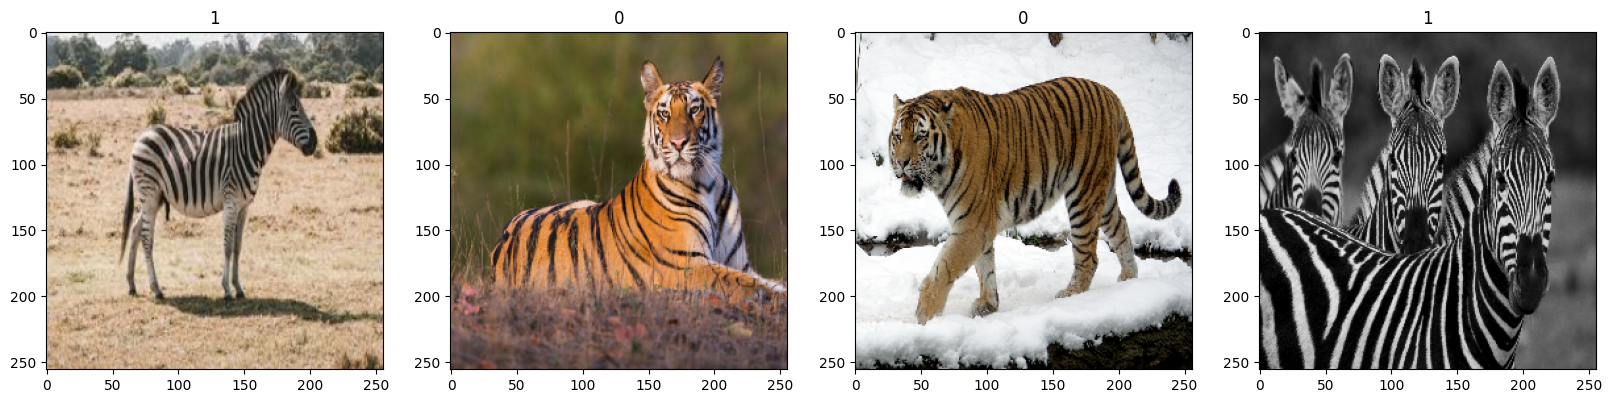

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
dataset = dataset.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [21]:
dataset.as_numpy_iterator().next()

(array([[[[9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          [9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          [9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          ...,
          [9.94362772e-01, 5.46997547e-01, 3.99080873e-01],
          [9.72610295e-01, 5.44914186e-01, 4.23161775e-01],
          [9.44669127e-01, 5.86335778e-01, 4.76531863e-01]],
 
         [[9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          [9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          [9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          ...,
          [9.94362772e-01, 5.46997547e-01, 3.99080873e-01],
          [9.72610295e-01, 5.44914186e-01, 4.23161775e-01],
          [9.44669127e-01, 5.86335778e-01, 4.76531863e-01]],
 
         [[9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          [9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          [9.96078432e-01, 5.37254930e-01, 4.07843143e-01],
          ...,
          [9.94362772e-01, 5.46997547e-01, 3.9908

In [22]:
training_size = int(len(dataset)*.7)
validation_size = int(len(dataset)*.2)+1
testing_size = int(len(dataset)*.1)+1

In [23]:
print (training_size)
print (validation_size)
print (testing_size)

6
2
1


In [24]:
training = dataset.take(training_size)
validation = dataset.skip(training_size).take(validation_size)
testing = dataset.skip(training_size+validation_size).take(testing_size)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
fit = model.fit(training, epochs=20, validation_data=validation)

Epoch 1/20
6/6 [==============================] - 5s 648ms/step - loss: 0.9034 - accuracy: 0.5208 - val_loss: 0.7088 - val_accuracy: 0.4688
Epoch 2/20
6/6 [==============================] - 5s 640ms/step - loss: 0.6614 - accuracy: 0.5573 - val_loss: 0.6207 - val_accuracy: 0.5625
Epoch 3/20
6/6 [==============================] - 5s 635ms/step - loss: 0.6058 - accuracy: 0.6562 - val_loss: 0.4909 - val_accuracy: 0.8281
Epoch 4/20
6/6 [==============================] - 5s 635ms/step - loss: 0.4501 - accuracy: 0.8281 - val_loss: 0.3276 - val_accuracy: 0.8594
Epoch 5/20
6/6 [==============================] - 5s 657ms/step - loss: 0.3234 - accuracy: 0.8490 - val_loss: 0.3233 - val_accuracy: 0.8438
Epoch 6/20
6/6 [==============================] - 5s 639ms/step - loss: 0.3363 - accuracy: 0.8333 - val_loss: 0.3101 - val_accuracy: 0.9062
Epoch 7/20
6/6 [==============================] - 5s 640ms/step - loss: 0.3036 - accuracy: 0.8854 - val_loss: 0.2854 - val_accuracy: 0.9219
Epoch 8/20
6/6 [====

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [36]:
for batch in testing.as_numpy_iterator(): 
    x, y = batch
    predict = model.predict(x)
    precision.update_state(y, predict)
    recall.update_state(y, predict)
    accuracy.update_state(y, predict)

1/1 [==============================] - 0s 111ms/step


In [37]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


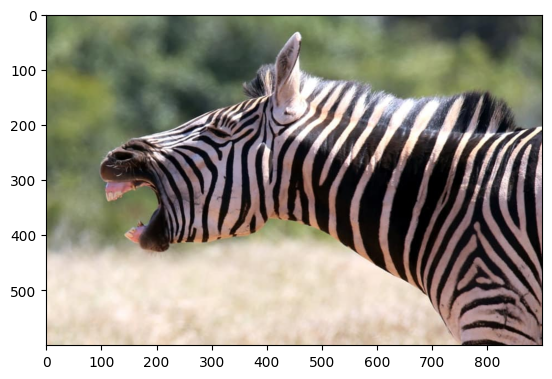

In [38]:
img = cv2.imread('Aleena-Amur-Tiger.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

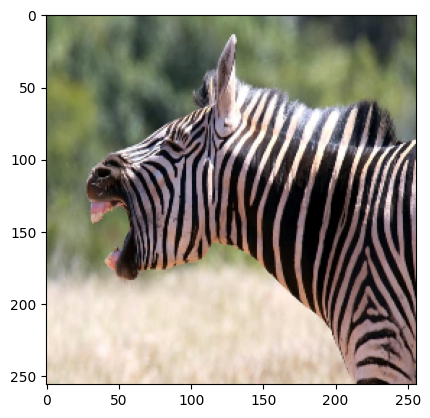

In [39]:
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [40]:
predict2 = model.predict(np.expand_dims(resized/255, 0))

1/1 [==============================] - 0s 19ms/step


In [41]:
predict2

array([[0.9999999]], dtype=float32)

In [44]:
if predict2 > 0.5: 
    print(f'The predicted class is Zebra')
else:
    print(f'The predicted class is Tiger')

The predicted class is Zebra


In [123]:
from tensorflow.keras.models import load_model

In [124]:
model.save(os.path.join('models','imageclassify.h5'))